In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Emissions_Agriculture_Burning_crop_residues_E_All_Data_(Normalized).csv",encoding='ISO-8859-1')

In [ ]:
df = pd.read_csv(r"C:\Users\personal\Projects\FAOSTAT\Emissions_Agriculture_Burning_crop_residues_E_All_Data_(Normalized).csv", 
                 encoding='ISO-8859-1', low_memory=False)

# **Step-1: Data Understanding**

In [9]:
df.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Source Code,Source,Unit,Value,Flag,Note
0,2,'004,Afghanistan,1712,'F1712,All Crops,7245,Biomass burned (dry matter),1961,1961,3050,FAO TIER 1,tonnes,1508670.0,E,NaN
1,2,'004,Afghanistan,1712,'F1712,All Crops,7245,Biomass burned (dry matter),1962,1962,3050,FAO TIER 1,tonnes,1553070.0,E,NaN
2,2,'004,Afghanistan,1712,'F1712,All Crops,7245,Biomass burned (dry matter),1963,1963,3050,FAO TIER 1,tonnes,1553070.0,E,NaN
3,2,'004,Afghanistan,1712,'F1712,All Crops,7245,Biomass burned (dry matter),1964,1964,3050,FAO TIER 1,tonnes,1565170.0,E,NaN
4,2,'004,Afghanistan,1712,'F1712,All Crops,7245,Biomass burned (dry matter),1965,1965,3050,FAO TIER 1,tonnes,1561100.0,E,NaN


In [10]:
df.columns

Index(['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item Code (CPC)',
       'Item', 'Element Code', 'Element', 'Year Code', 'Year', 'Source Code',
       'Source', 'Unit', 'Value', 'Flag', 'Note'],
      dtype='object')

In [12]:
df.dtypes

Area Code            int64
Area Code (M49)     object
Area                object
Item Code            int64
Item Code (CPC)     object
Item                object
Element Code         int64
Element             object
Year Code            int64
Year                 int64
Source Code          int64
Source              object
Unit                object
Value              float64
Flag                object
Note                object
dtype: object

In [13]:
df.describe()

,Area Code,Item Code,Element Code,Year Code,Year,Source Code,Value
count,161314.000000,161314.000000,161314.000000,161314.000000,161314.000000,161314.000000,1.613140e+05
mean,1171.311306,487.576354,7233.262147,1993.362969,1993.362969,3050.037889,1.482317e+06
std,2110.923776,724.894587,8.476208,19.048245,19.048245,0.190928,1.110758e+07
min,1.000000,15.000000,7225.000000,1961.000000,1961.000000,3050.000000,0.000000e+00
25%,79.000000,27.000000,7225.000000,1978.000000,1978.000000,3050.000000,1.200000e-02
50%,157.000000,56.000000,7230.000000,1994.000000,1994.000000,3050.000000,6.307000e-01
75%,234.000000,1712.000000,7245.000000,2008.000000,2008.000000,3050.000000,8.465575e+03
max,5873.000000,1712.000000,7245.000000,2050.000000,2050.000000,3051.000000,3.970956e+08


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161314 entries, 0 to 161313
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Area Code        161314 non-null  int64  
 1   Area Code (M49)  161314 non-null  object 
 2   Area             161314 non-null  object 
 3   Item Code        161314 non-null  int64  
 4   Item Code (CPC)  161314 non-null  object 
 5   Item             161314 non-null  object 
 6   Element Code     161314 non-null  int64  
 7   Element          161314 non-null  object 
 8   Year Code        161314 non-null  int64  
 9   Year             161314 non-null  int64  
 10  Source Code      161314 non-null  int64  
 11  Source           161314 non-null  object 
 12  Unit             161314 non-null  object 
 13  Value            161314 non-null  float64
 14  Flag             161314 non-null  object 
 15  Note             6112 non-null    object 
dtypes: float64(1), int64(6), object(9)
mem

# **Step-2: Analyzing the features**

**Feature: Area**

In [58]:
# Number of Countries Present in a Dataset
number_of_countries = len(df['Area'].value_counts())
print('Number of countries present in Dataset: {}'.format(number_of_countries))
print()
# List of Countries Present in a Dataset
countries = df.Area.unique()
print(df.Area.unique())

Number of countries present in Dataset: 243

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium'
 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'China, Hong Kong SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Czechoslovakia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Ethiopia PDR' 'Fiji' 'Finland' 'France'
 'French Guyana' 'French Polynesia' 'Gabon' 'Gam

**Feature: Item**

In [56]:
# Type of Items (crops) in the dataset
crops = df.Item.unique()
print(df.Item.unique())

['All Crops' 'Maize (corn)' 'Rice' 'Sugar cane' 'Wheat']


**Feature: Element**

In [36]:
# Types of Emissions in dataset
print(df.Element.unique())

['Biomass burned (dry matter)' 'Emissions (N2O)' 'Emissions (CH4)']


**Feature: Year**

In [37]:
# Types of Year in dataset
print(df.Year.unique())

[1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988
 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2030 2050]


**Feature: Value**

In [40]:
# Range of Values
print("Minimum value of all values in Value feature: {}".format(min(df['Value'])))
print("Maximum value of all values in Value feature: {}".format(max(df['Value'])))

Minimum value of all values in Value feature: 0.0
Maximum value of all values in Value feature: 397095606.65


Text(0.5, 0, 'Tons')

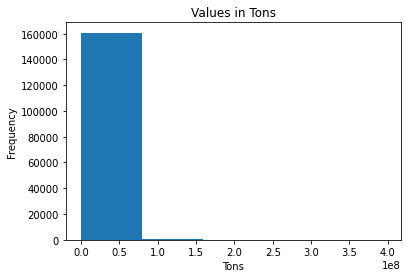

In [44]:
ax =df['Value'].plot(kind='hist',bins=5, title="Values in Tons")
ax.set_xlabel("Tons")

In [45]:
print(df.Flag.unique())

['E' 'A']


# **Step-2: Data Preperation**

In [59]:
custom_df = pd.DataFrame()

In [60]:
custom_df["Area"] = df['Area']
custom_df["Item"] = df['Item']
custom_df["Element"] = df["Element"]
custom_df["Year"] = df["Year"]
custom_df["Value"] = df["Value"]

In [68]:
custom_df.head(10)

,Area,Item,Element,Year,Value
0,Afghanistan,All Crops,Biomass burned (dry matter),1961,1508670.0
1,Afghanistan,All Crops,Biomass burned (dry matter),1962,1553070.0
2,Afghanistan,All Crops,Biomass burned (dry matter),1963,1553070.0
3,Afghanistan,All Crops,Biomass burned (dry matter),1964,1565170.0
4,Afghanistan,All Crops,Biomass burned (dry matter),1965,1561100.0
5,Afghanistan,All Crops,Biomass burned (dry matter),1966,1561800.0
6,Afghanistan,All Crops,Biomass burned (dry matter),1967,1469600.0
7,Afghanistan,All Crops,Biomass burned (dry matter),1968,1382000.0
8,Afghanistan,All Crops,Biomass burned (dry matter),1969,1399925.0
9,Afghanistan,All Crops,Biomass burned (dry matter),1970,1435125.0


In [67]:
countries = df.Area.unique()
#@title String fields
From_year = "1965" #@param ['1961', '1962', '1963','1964','1965','1966','1967']
To_year = "1962" #@param ['1961', '1962', '1963','1964','1965','1966','1967']
Country = "Afghanistan" #@param ['Total World','Afghanistan','Albania','Algeria','American Samoa','Angola']
Items = "All Crops" #@param ['All Crops','Maize (corn)','Rice','Sugar cane','Wheat']
Element = "Biomass burned (dry matter)" #@param ['Biomass burned (dry matter)','Emissions (N2O)','Emissions (CH4)']

In [62]:
def Year_Checking():
  if (From_year <  To_year):
    return True

def main():
  if (Year_Checking()== True):
    match Country:
      case "Total World":
        pass
      case _: #default
        default()
  else:
    print("Select correct Range for the Year")


In [63]:
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Generate")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    main()

button.on_click(on_button_clicked)
display(button, output)

Button(description='Generate', style=ButtonStyle())

Output()

In [57]:
for country in countries:
  Items = []
  Elements = []
  for i in range(len(custom_df["Area"])):
    if custom_df["Area"][i]==country:
      Items.append(custom_df["Area"][i])
      Elements.append(custom_df["Area"][i])
  

In [ ]:
def default():
  for country in countries:
    Items = []
    Elements = []
    for i in range(len(custom_df["Area"])):
      if custom_df["Area"][i]==country:
        Items.append(custom_df["Area"][i])
        Elements.append(custom_df["Area"][i])

In [70]:
custom_df["Year"].value_counts()

2000    2915
1994    2892
2019    2848
2018    2848
2005    2833
        ... 
1962    2331
1961    2331
1965    2328
1964    2328
1963    2328
Name: Year, Length: 62, dtype: int64